In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('import successfully')

import successfully


In [2]:
tips=sns.load_dataset('tips')
# display the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [16]:
Friday_meals = tips.loc[tips['day']=='Fri']
Friday_meals

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [4]:
#sunday transcation withonly 'total_bills'and 'tips' colums
tips.loc[tips['day'] =='Sun',['total_bill','tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
186,20.90,3.50
187,30.46,2.00
188,18.15,3.50
189,23.10,4.00


In [17]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

.iloc[]-position-Based selection

In [6]:
# print the first 10 row
first_10_orders = tips.iloc[10:]
first_10_orders

,total_bill,tip,sex,smoker,day,time,size
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
# get first 10 row and first 3 colums
subset_data=tips.iloc[:10,:3]
subset_data

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
5,25.29,4.71,Male
6,8.77,2.00,Male
7,26.88,3.12,Male
8,15.04,1.96,Male
9,14.78,3.23,Male


# query()-SQL-like filtering

In [8]:
# get high spender in weekends
high_spenders=tips.query("total_bill > 30 and smoker=='Yes'")
high_spenders

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
83,32.68,5.00,Male,Yes,Thur,Lunch,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
170,50.81,10.00,Male,Yes,Sat,Dinner,3
173,31.85,3.18,Male,Yes,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [9]:
# get the tips for weekend
high_tippers = tips.query("tip > 6 and day in ['Sat','Sun']")
high_tippers

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


# .merge()-Combining DataFrames

In [10]:
discounts=pd.DataFrame({
    "day":["Su","Sat","Thur","Fri"],
    "discount": [5,10,3,7]
})

In [11]:
merged_tips = tips.merge(discounts, on="day",how='left')
merged_tips.query("day=='Thur'")
merged_tips.head(40)

,total_bill,tip,sex,smoker,day,time,size,discount
0,16.99,1.01,Female,No,Sun,Dinner,2,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,NaN
2,21.01,3.50,Male,No,Sun,Dinner,3,NaN
3,23.68,3.31,Male,No,Sun,Dinner,2,NaN
4,24.59,3.61,Female,No,Sun,Dinner,4,NaN
5,25.29,4.71,Male,No,Sun,Dinner,4,NaN
6,8.77,2.00,Male,No,Sun,Dinner,2,NaN
7,26.88,3.12,Male,No,Sun,Dinner,4,NaN
8,15.04,1.96,Male,No,Sun,Dinner,2,NaN
9,14.78,3.23,Male,No,Sun,Dinner,2,NaN


# Heat Map->correlation

In [12]:
correlation_matrix=tips.corr(numeric_only=True)

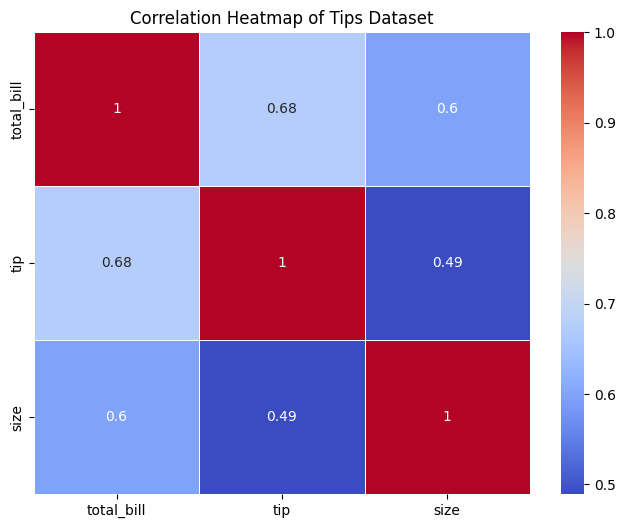

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap of Tips Dataset")

plt.show()
          